In [ ]:
!pip install -U pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import cv2
import PIL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,RandomContrast,RandomFlip,RandomRotation,RandomZoom

In [ ]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file(fname='flower_photos',origin=dataset_url,cache_dir='/content/drive/MyDrive/Deep Learning',untar=True)

In [ ]:
data_dir

'/content/drive/MyDrive/Deep Learning/datasets/flower_photos'

In [ ]:
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Deep Learning/datasets/flower_photos')

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses=list(data_dir.glob('roses/*.jpg'))
len(roses)

641

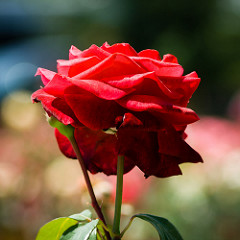

In [ ]:
PIL.Image.open(str(roses[300]))

In [ ]:
daisy=list(data_dir.glob('daisy/*.jpg'))
len(daisy)

633

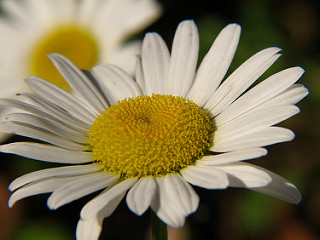

In [ ]:
PIL.Image.open(str(daisy[595]))

In [ ]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg')),
}

In [ ]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('/content/drive/MyDrive/Deep Learning/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/Deep Learning/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/Deep Learning/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/Deep Learning/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deep Learning/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [ ]:
flowers_labels_dict['dandelion']

2

In [ ]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[255, 254, 254],
        [248, 253, 252],
        [244, 250, 249],
        ...,
        [255, 249, 254],
        [255, 248, 254],
        [255, 248, 254]],

       [[127, 174, 225],
        [134, 191, 236],
        [127, 179, 219],
        ...,
        [152, 197, 234],
        [144, 198, 233],
        [144, 198, 233]],

       [[174, 202, 232],
        [163, 200, 228],
        [167, 204, 232],
        ...,
        [170, 207, 235],
        [173, 207, 237],
        [173, 207, 237]],

       ...,

       [[252, 245, 252],
        [253, 246, 253],
        [253, 246, 253],
        ...,
        [253, 249, 255],
        [249, 245, 251],
        [249, 245, 251]],

       [[254, 247, 254],
        [254, 247, 254],
        [253, 246, 253],
        ...,
        [251, 243, 253],
        [252, 248, 254],
        [252, 248, 254]],

       [[249, 246, 255],
        [248, 245, 254],
        [248, 245, 254],
        ...,
        [254, 245, 255],
        [250, 243, 255],
        [250, 243, 255]]

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X,y=[] ,[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X[7]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
model=Sequential([
    Conv2D(filters=15,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',activation='relu',input_shape=((180, 180, 3))),
    MaxPooling2D((3,3)),
    Conv2D(filters=8,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(filters=7,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'),
    MaxPooling2D((3,3)),
    #flatten
    Flatten(),
    #fully connected NN
    Dense(units=46,activation='relu',kernel_initializer='he_uniform'),
    Dense(units=5,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=30,validation_split=0.25,batch_size=64)

Epoch 1/30
35/35 [==============================] - 2s 49ms/step - loss: 0.6697 - accuracy: 0.7421 - val_loss: 0.9403 - val_accuracy: 0.6635
Epoch 2/30
35/35 [==============================] - 1s 33ms/step - loss: 0.6572 - accuracy: 0.7425 - val_loss: 0.9083 - val_accuracy: 0.6730
Epoch 3/30
35/35 [==============================] - 1s 33ms/step - loss: 0.6651 - accuracy: 0.7475 - val_loss: 0.9057 - val_accuracy: 0.6580
Epoch 4/30
35/35 [==============================] - 1s 33ms/step - loss: 0.6318 - accuracy: 0.7566 - val_loss: 0.9095 - val_accuracy: 0.6744
Epoch 5/30
35/35 [==============================] - 1s 33ms/step - loss: 0.6182 - accuracy: 0.7639 - val_loss: 0.9265 - val_accuracy: 0.6703
Epoch 6/30
35/35 [==============================] - 1s 36ms/step - loss: 0.6067 - accuracy: 0.7639 - val_loss: 0.9095 - val_accuracy: 0.6649
Epoch 7/30
35/35 [==============================] - 1s 33ms/step - loss: 0.5977 - accuracy: 0.7797 - val_loss: 0.9073 - val_accuracy: 0.6812
Epoch 8/30
35

In [ ]:
model.evaluate(X_test_scaled,y_test)  

23/23 [==============================] - 0s 11ms/step - loss: 1.1099 - accuracy: 0.6390


[1.1099246740341187, 0.6389645934104919]

In [ ]:
predictions=model.predict(X_test_scaled)
predictions[0]

array([8.5120189e-01, 1.2531593e-01, 1.6177605e-08, 2.8591063e-03,
       2.0623067e-02], dtype=float32)

In [ ]:
np.argmax(predictions[0]) #wrongly predicted

0

In [ ]:
y_test[0]

1

**Addressing the issue of overfitting using Data Augmentation**

In [ ]:
data_augmentation=Sequential([
   
    tf.keras.layers.RandomContrast(
    factor=0.2, seed=None),

  
    tf.keras.layers.RandomFlip(
    mode='horizontal_and_vertical'),
    
    tf.keras.layers.RandomRotation(
    factor=0.2,
    fill_value=0.0,),

    tf.keras.layers.RandomZoom(.5, .2)
])

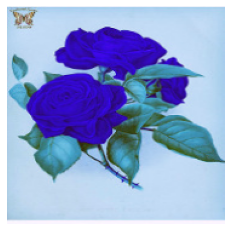

In [ ]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(X[0])

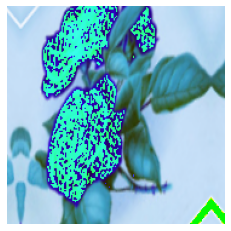

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
model = Sequential([
  data_augmentation,
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30,batch_size=64,validation_split=0.33)    

Epoch 1/30
31/31 [==============================] - 4s 78ms/step - loss: 1.4744 - accuracy: 0.3427 - val_loss: 1.2038 - val_accuracy: 0.4438
Epoch 2/30
31/31 [==============================] - 2s 60ms/step - loss: 1.1624 - accuracy: 0.4997 - val_loss: 1.1052 - val_accuracy: 0.5686
Epoch 3/30
31/31 [==============================] - 2s 60ms/step - loss: 1.0885 - accuracy: 0.5643 - val_loss: 1.0218 - val_accuracy: 0.5944
Epoch 4/30
31/31 [==============================] - 2s 61ms/step - loss: 1.0166 - accuracy: 0.5948 - val_loss: 1.1172 - val_accuracy: 0.5738
Epoch 5/30
31/31 [==============================] - 2s 60ms/step - loss: 0.9680 - accuracy: 0.6177 - val_loss: 0.9263 - val_accuracy: 0.6460
Epoch 6/30
31/31 [==============================] - 2s 61ms/step - loss: 0.9023 - accuracy: 0.6523 - val_loss: 0.9274 - val_accuracy: 0.6471
Epoch 7/30
31/31 [==============================] - 2s 61ms/step - loss: 0.9296 - accuracy: 0.6207 - val_loss: 0.9054 - val_accuracy: 0.6450
Epoch 8/30
31

In [ ]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 0s 15ms/step - loss: 0.7840 - accuracy: 0.7180


[0.783955991268158, 0.7179836630821228]